<a href="https://colab.research.google.com/github/njho/Notebooks/blob/master/PyTorch_Training_a_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision

import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


truck  ship  frog  deer


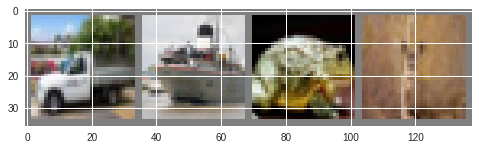

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [6]:
for epoch in range(2): # Loop over multiple data sets
    
    running_loss = 0.0;
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        
        # Enumerate and iter, allows you to pull inputs, labels from the `DataLoader`
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(loss)
            print(i)
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

        
print('Finished Training')

        
     

tensor(2.0576, grad_fn=<NllLossBackward>)
1999
[1,  2000] loss: 2.206
tensor(2.3330, grad_fn=<NllLossBackward>)
3999
[1,  4000] loss: 1.941
tensor(1.4716, grad_fn=<NllLossBackward>)
5999
[1,  6000] loss: 1.752
tensor(0.9583, grad_fn=<NllLossBackward>)
7999
[1,  8000] loss: 1.651
tensor(2.0804, grad_fn=<NllLossBackward>)
9999
[1, 10000] loss: 1.555
tensor(2.2891, grad_fn=<NllLossBackward>)
11999
[1, 12000] loss: 1.508
tensor(1.3745, grad_fn=<NllLossBackward>)
1999
[2,  2000] loss: 1.426
tensor(1.6084, grad_fn=<NllLossBackward>)
3999
[2,  4000] loss: 1.402
tensor(0.9109, grad_fn=<NllLossBackward>)
5999
[2,  6000] loss: 1.361
tensor(1.5441, grad_fn=<NllLossBackward>)
7999
[2,  8000] loss: 1.360
tensor(1.0378, grad_fn=<NllLossBackward>)
9999
[2, 10000] loss: 1.327
tensor(1.0881, grad_fn=<NllLossBackward>)
11999
[2, 12000] loss: 1.307
Finished Training


GroundTruth:    cat  ship  ship plane


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f2a3bf5f9e8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
  Fil

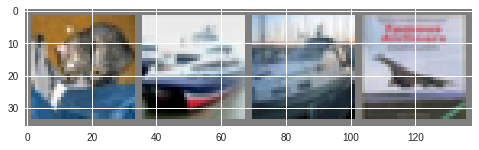

In [7]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images)


In [9]:
print(outputs)

tensor([[-1.5465, -1.3505,  1.4230,  2.4248,  1.6277,  1.6545,  0.6001, -0.5791,
         -1.6175, -2.9182],
        [ 4.6234,  5.7103, -3.5348, -3.5852, -3.1786, -5.1273, -3.6941, -5.0986,
          6.7209,  5.0587],
        [ 2.1052,  3.1326, -1.6937, -1.9615, -2.2457, -2.8847, -2.1659, -2.9165,
          3.8045,  3.3234],
        [ 3.3007,  2.2734, -1.3629, -1.9609, -1.4540, -3.7337, -3.0262, -3.2775,
          5.4229,  2.6244]], grad_fn=<ThAddmmBackward>)


In [10]:
what, predicted = torch.max(outputs, 1)
print(what)
print(predicted)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

tensor([2.4248, 6.7209, 3.8045, 5.4229], grad_fn=<MaxBackward0>)
tensor([3, 8, 8, 8])
Predicted:    cat  ship  ship  ship


In [11]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        
        # For each batch of (4) get the predictions...
        _, predicted = torch.max(outputs.data, 1)
        
        # predicted contains the index of the expected label
#         print(predicted)
#         print(labels.size(0))
        print(predicted == labels)  #tensor([0, 1, 0, 0], dtype=torch.uint8)
        print((predicted == labels).sum())  #tensor(1)
        print((predicted == labels).sum().item()) #1
        
        # We do labels.size(0) because it tells us the total number of labels (our batch size)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

tensor([1, 1, 1, 0], dtype=torch.uint8)
tensor(3)
3
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor(2)
2
tensor([0, 0, 0, 1], dtype=torch.uint8)
tensor(1)
1
tensor([0, 1, 1, 1], dtype=torch.uint8)
tensor(3)
3
tensor([0, 0, 0, 0], dtype=torch.uint8)
tensor(0)
0
tensor([1, 1, 1, 1], dtype=torch.uint8)
tensor(4)
4
tensor([0, 0, 1, 0], dtype=torch.uint8)
tensor(1)
1
tensor([1, 1, 0, 1], dtype=torch.uint8)
tensor(3)
3
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor(2)
2
tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor(2)
2
tensor([0, 1, 1, 1], dtype=torch.uint8)
tensor(3)
3
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor(2)
2
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor(2)
2
tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor(2)
2
tensor([1, 0, 0, 0], dtype=torch.uint8)
tensor(1)
1
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor(2)
2
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor(2)
2
tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor(2)
2
tensor([1, 1, 0, 1], dtype=torch.uint8)
tensor(3)
3
tensor([0, 1

In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 43 %
Accuracy of   car : 46 %
Accuracy of  bird : 37 %
Accuracy of   cat : 18 %
Accuracy of  deer : 40 %
Accuracy of   dog : 61 %
Accuracy of  frog : 75 %
Accuracy of horse : 64 %
Accuracy of  ship : 65 %
Accuracy of truck : 74 %
